# 2 Geodata

`location` kolonnen kommer fra google maps og indeholder koordinat og zoom level.

Vi skal have oversat til noget vi kan bruge i vores kort.

Det bliver til `geometry` kolonnen i WKT format.

Vi bruger `geopandas` til at gøre datasættet geografisk.

Der er 2 plot i denne notebook:
1. `plot` er et plot af alle punkterne i datasættet, med Peter Mærsk.
2. `plot2` er et plot af alle breve, hvor vi har tegnet linjer mellem punkter. Her er det kun breve fra Peter Mærsk, da det er ham, vi gerne vil følge

In [1]:
# load jsonfile from disk
import geopandas as gpd
from matplotlib import pyplot as plt


In [2]:
# historical background map
gdf1914world = gpd.read_file('../maps/1914/1914.geojson')


In [3]:

capitals = gpd.read_file('../maps/capitals.geojson', encoding='utf-8', engine='pyogrio')


In [4]:
# remove the world outside 
ylim=(43,60)
xlim=(-3,40)

# remove countries outside the map
gdf1914 = gdf1914world.cx[xlim[0]:xlim[1], ylim[0]:ylim[1]]

In [6]:
danish_countries = [
    'Belgien', 'Bulgarien', 'Schweiz', 'Danmark', 'Finland', 'Frankrig', 
    'Guernsey', 'Italien', 'Jersey', 'Liechtenstein', 'Luxembourg', 
    'Montenegro', 'Holland', 'Norge', 'San Marino', 'Serbien', 
    'Sverige', 'Rumænien', 'Østrig-Ungarn', 'Storbritannien', 
    'Tyskland', 'Den Russiske Føderation', 'Monaco', 'Spanien'
]

skip_countries = [
    'Guernsey','Liechtenstein', 'Luxembourg', 'San Marino','Monaco', 'Jersey','Danmark'
    ,'Storbritannien','Frankrig','Tyskland','Østrig-Ungarn',
]

# English names of the countries
english_countries = [
    'Belgium', 'Bulgaria', 'Switzerland', 'Denmark', 'Finland', 'France', 
    'Guernsey', 'Italy', 'Jersey', 'Liechtenstein', 'Luxembourg', 
    'Montenegro', 'Netherlands', 'Norway', 'San Marino', 'Serbia', 
    'Sweden', 'Rumania', 'Austria - Hungary ', 'United Kingdom', 
    'Germany', 'Russian Federation', 'Monaco', 'Spain'
]

# Function to replace English country names with Danish names in a GeoPandas DataFrame
def replace_country_names(df, column_name='NAME'):
    translation_map = dict(zip(english_countries, danish_countries))
    df[column_name] = df[column_name].map(translation_map).fillna(df[column_name])

replace_country_names(gdf1914)
# set name of skip countries to None
gdf1914.loc[gdf1914['NAME'].isin(skip_countries), 'NAME'] = None

# save 
gdf1914.to_file('../maps/1914/1914_dk.geojson', driver='GeoJSON', encoding='utf-8')


c:\Users\christian.dalager\AppData\Local\anaconda3\envs\jernkors\lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


[]

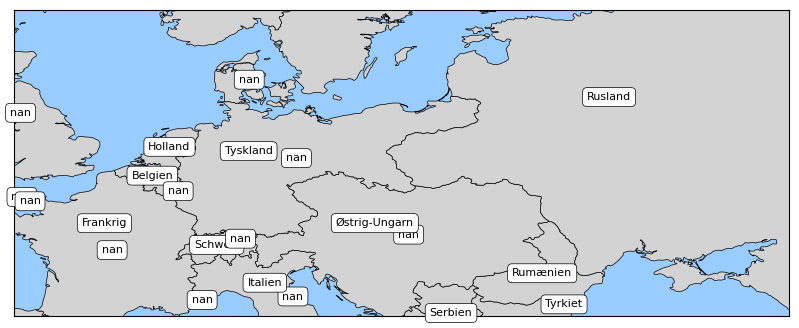

In [ ]:
import geopandas as gpd
from matplotlib import pyplot as plt

gdf1914dk = gpd.read_file('../maps/1914/1914_dk.geojson')

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_ylim(43, 60)
ax.set_xlim(-3, 40)
ax.set_facecolor('#99ccff')
gdf1914dk.plot(ax=ax,aspect='equal', color='lightgrey', edgecolor='black', linewidth=0.5)

bboxstyle = dict(boxstyle="round,pad=0.4", fc="white", ec="black", lw=0.5)	
gdf1914dk.apply(lambda x:  x.NAME is nil: ax.annotate(x.NAME, xy=x.geometry.centroid.coords[0], ha="center", size=8, bbox=bboxstyle),axis=1,)
ax.annotate("Rusland", xy=(30, 55), ha="center", size=8, bbox=bboxstyle)
ax.annotate("Italien", xy=(10.9, 44.7), ha="center", size=8, bbox=bboxstyle)
ax.annotate("Tyrkiet", xy=(27.5, 43.5), ha="center", size=8, bbox=bboxstyle)
ax.annotate("Østrig-Ungarn", xy=(17, 48), ha="center", size=8, bbox=bboxstyle)
ax.annotate("Tyskland", xy=(10, 52), ha="center", size=8, bbox=bboxstyle)
ax.annotate("Frankrig", xy=(2, 48), ha="center", size=8, bbox=bboxstyle)


ax.set_xticks([])
ax.set_yticks([])
